# SPOTIFY SONGS ANALYSIS

In [1]:
# In this project we are going to analyze the songs by different categories.

In [2]:
# Importing required libraries --->
import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.simplefilter("ignore")
%matplotlib inline

In [3]:
# Importing dataset --->
songs_data = pd.read_csv('genres_v2.csv')
songs_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
# Getting details of the dataset --->
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
# Now just check for the null and duplicates values
print('null vals : ' , songs_data.isnull().sum())
print('duplicates : ' , songs_data.duplicated)


null vals :  danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64
duplicates :  <bound method DataFrame.duplicated of        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0  

In [6]:
# Now there are some unnecessory cols , so just remove them in order to make analysis more clear --->
songs_data.drop(['id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title', 'time_signature', 'type'], axis = 1, inplace = True)

In [7]:
songs_data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'genre'],
      dtype='object')

In [8]:
# setting genre as the index
songs_data.set_index('genre', inplace = True)

In [9]:
# Getting Generative descriptive distribution --->
songs_data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000


                  danceability    energy       key  loudness      mode  \
danceability          1.000000 -0.323248 -0.012708 -0.216776  0.084413   
energy               -0.323248  1.000000  0.044731  0.601540 -0.032203   
key                  -0.012708  0.044731  1.000000 -0.006810 -0.248283   
loudness             -0.216776  0.601540 -0.006810  1.000000 -0.004744   
mode                  0.084413 -0.032203 -0.248283 -0.004744  1.000000   
speechiness           0.182177 -0.148363 -0.030634  0.048035  0.050260   
acousticness          0.069910 -0.497334 -0.004937 -0.283876 -0.014514   
instrumentalness     -0.067114  0.303875  0.068266 -0.187933 -0.016402   
liveness             -0.196702  0.231754  0.002753  0.167104  0.007280   
valence               0.369845 -0.013520  0.028600  0.080916  0.022208   
tempo                -0.165929 -0.024504 -0.009862  0.151610 -0.012191   
duration_ms          -0.049807  0.294464  0.069255 -0.095999 -0.031253   

                  speechiness  acoust

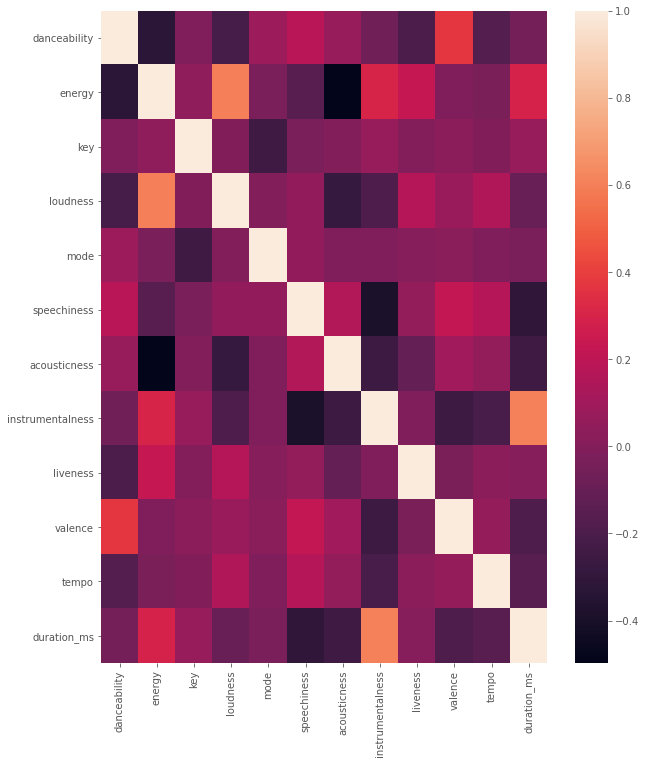

In [10]:
# Now lets check the dependancy of the cols through the numeric value , so we can focused on the highly correlated cols --->

plt.style.use('ggplot')

corr = songs_data.corr()
print(corr)
plt.figure(figsize = (10 , 12))
sns.heatmap(corr)
plt.show()

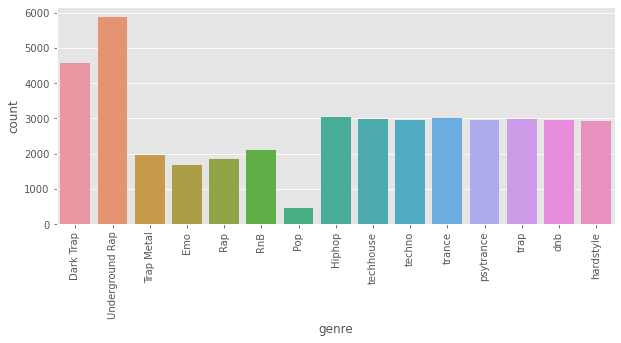

In [11]:
# Now lets begin with the distribution of the songs by the genres ---> 
plt.figure(figsize = (10, 4))
plt.xticks(rotation = 90)
sns.countplot(songs_data.index)
plt.show()

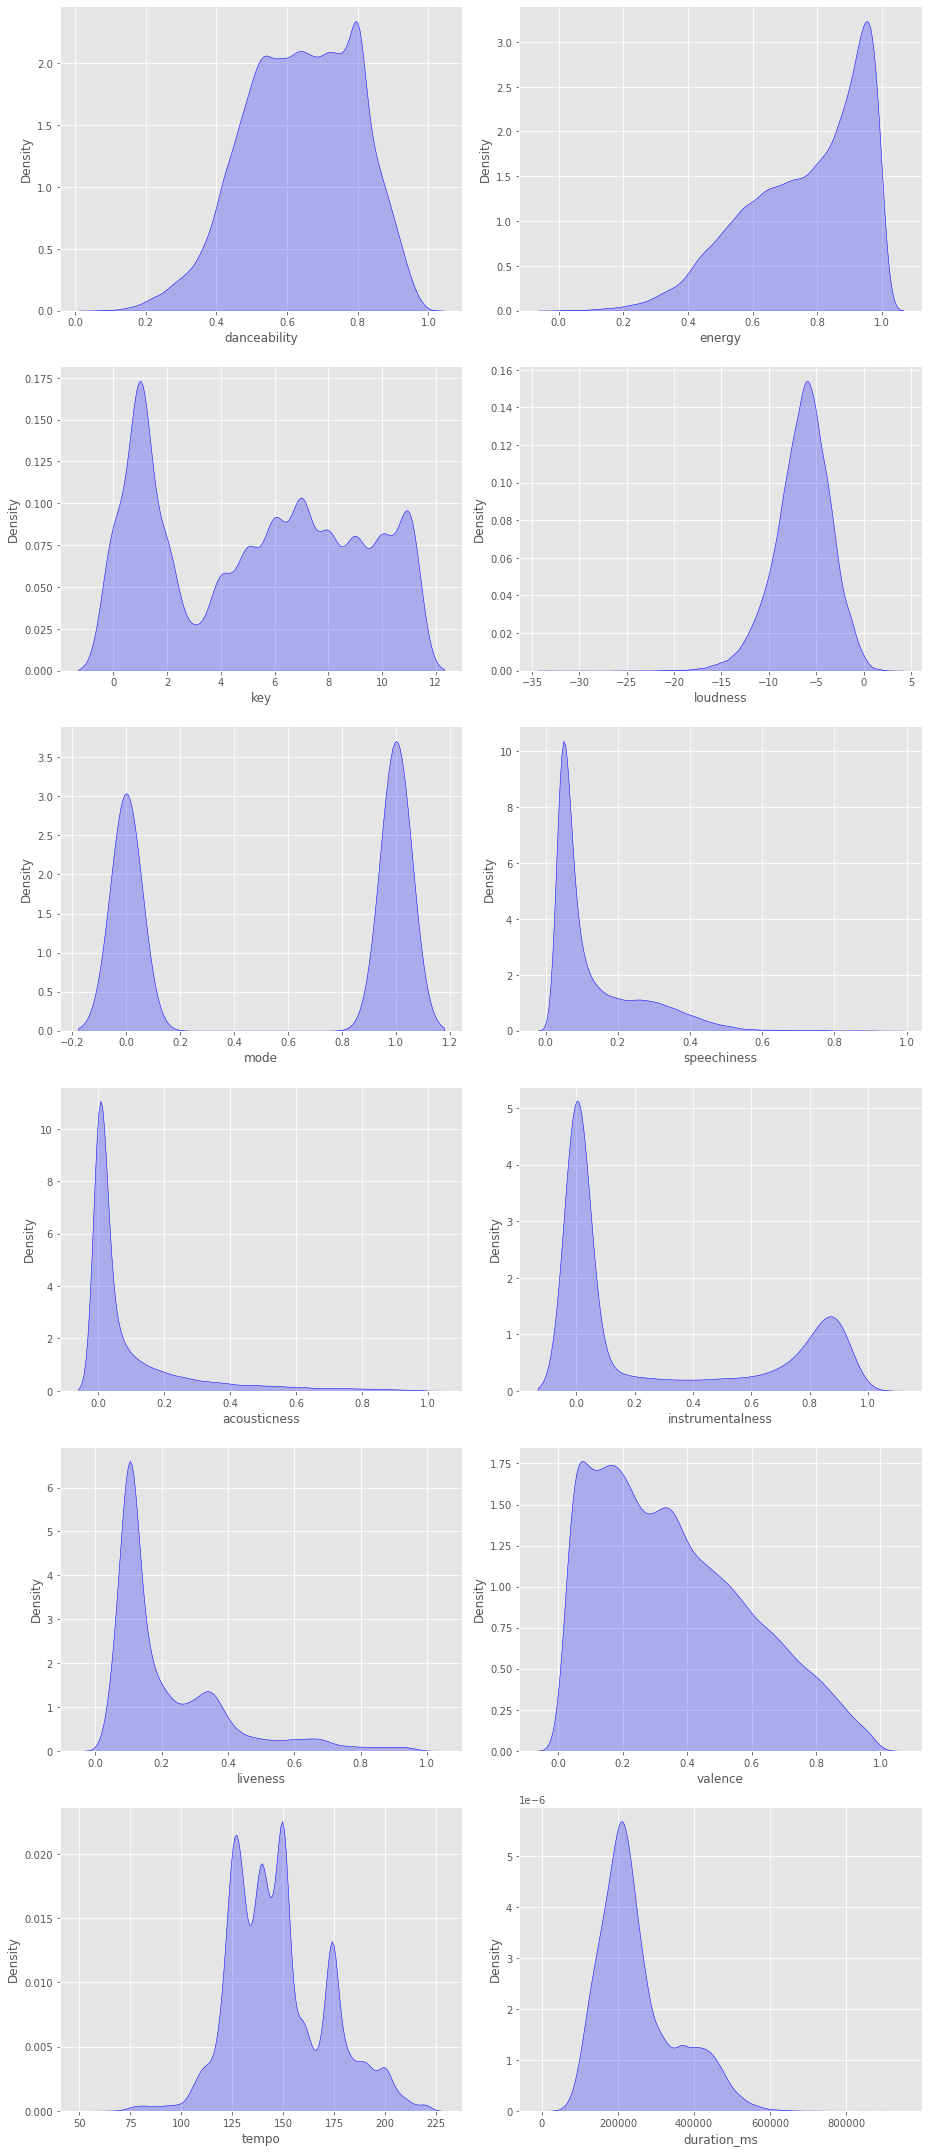

In [12]:
# Now check the values are normally distributed or not --->

lis = list(songs_data.columns)
fig, axs = plt.subplots(nrows=6, ncols=2, figsize = (13, 30))
axs = np.ravel(axs)
# print(x)
for i, col in enumerate(lis):
    plt.sca(axs[i])
    sns.kdeplot(data=songs_data[col], fill=True, color='blue')
plt.tight_layout()


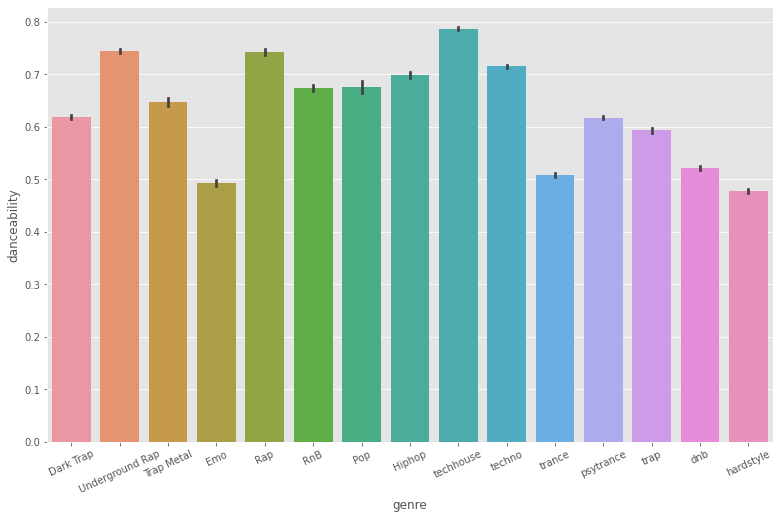

In [13]:
# Getting the average of the attributes in each genres --->
# 1) danceabiltiy -->
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=songs_data, x=songs_data.index, y='danceability')
plt.show()

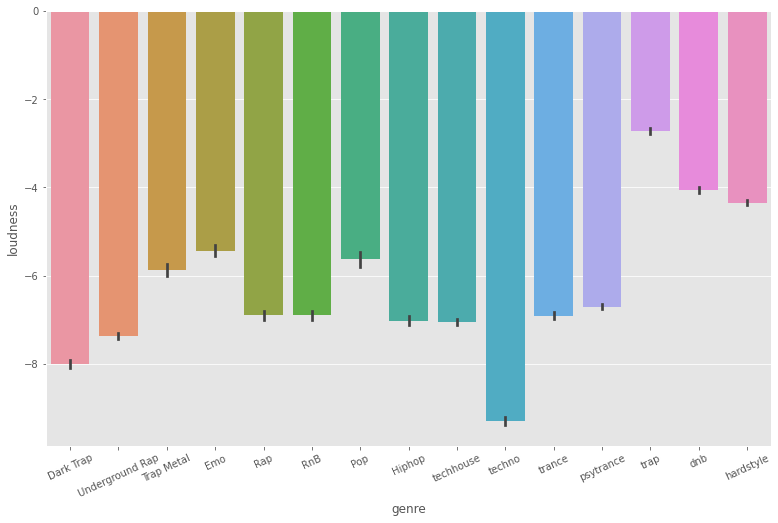

In [14]:
# 2) loudness -->
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=songs_data, x=songs_data.index, y='loudness')
plt.show()

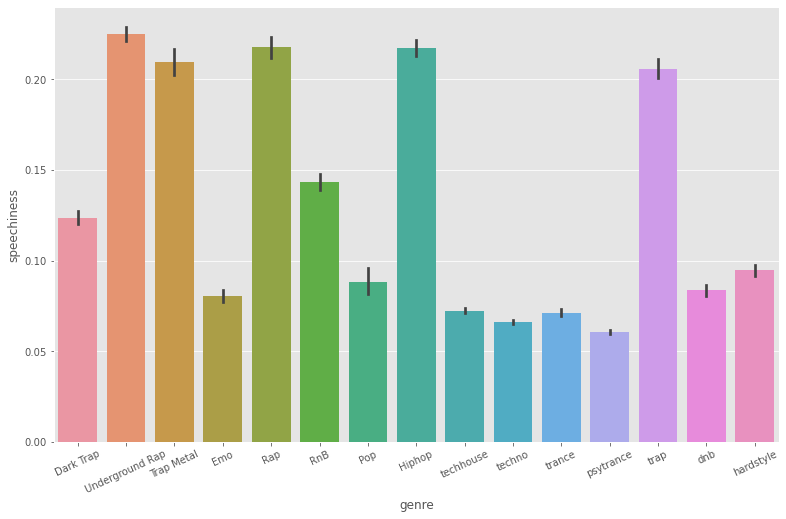

In [15]:
# 3) speechiness -->
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=songs_data, x=songs_data.index, y='speechiness')
plt.show()


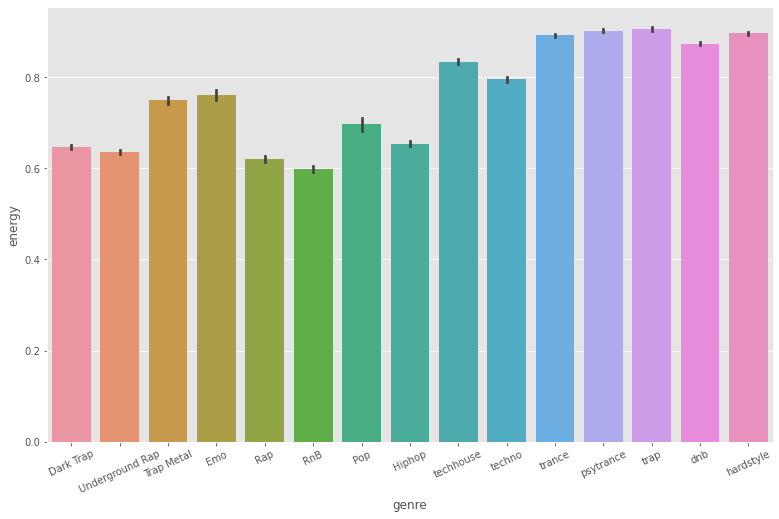

In [16]:
# 4) energy -->
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=songs_data, x=songs_data.index, y='energy')
plt.show()

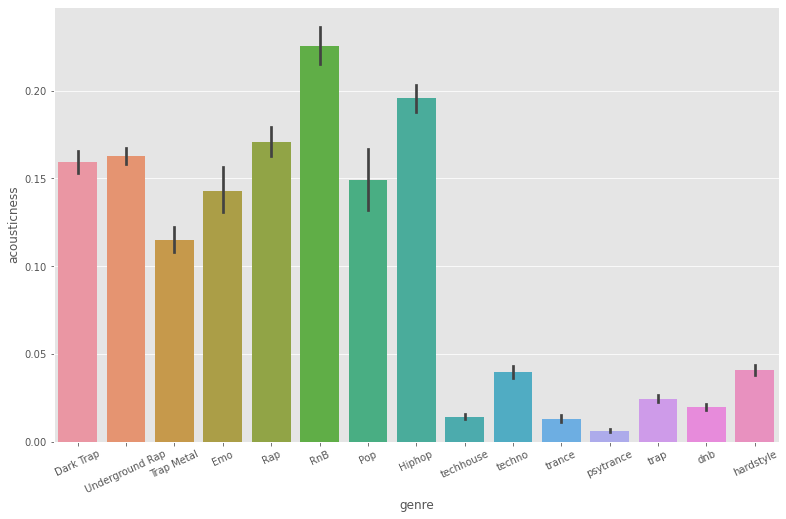

In [17]:
# 5) acousticness -->
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=songs_data, x=songs_data.index, y='acousticness')
plt.show()

# similarlly we can check for the other genres.

In [18]:
data = (songs_data
        .groupby(['genre', 'mode'])['mode']
        .count()
        .unstack(1))

data.style.background_gradient(cmap=plt.cm.coolwarm_r)

mode,0,1
genre,,
Dark Trap,2122,2456
Emo,528,1152
Hiphop,1430,1598
Pop,208,253
Rap,883,965
RnB,982,1117
Trap Metal,552,1404
Underground Rap,2270,3605
dnb,1643,1323


# Now check the effect of the other attributes on the energy --->

<AxesSubplot:xlabel='instrumentalness', ylabel='energy'>

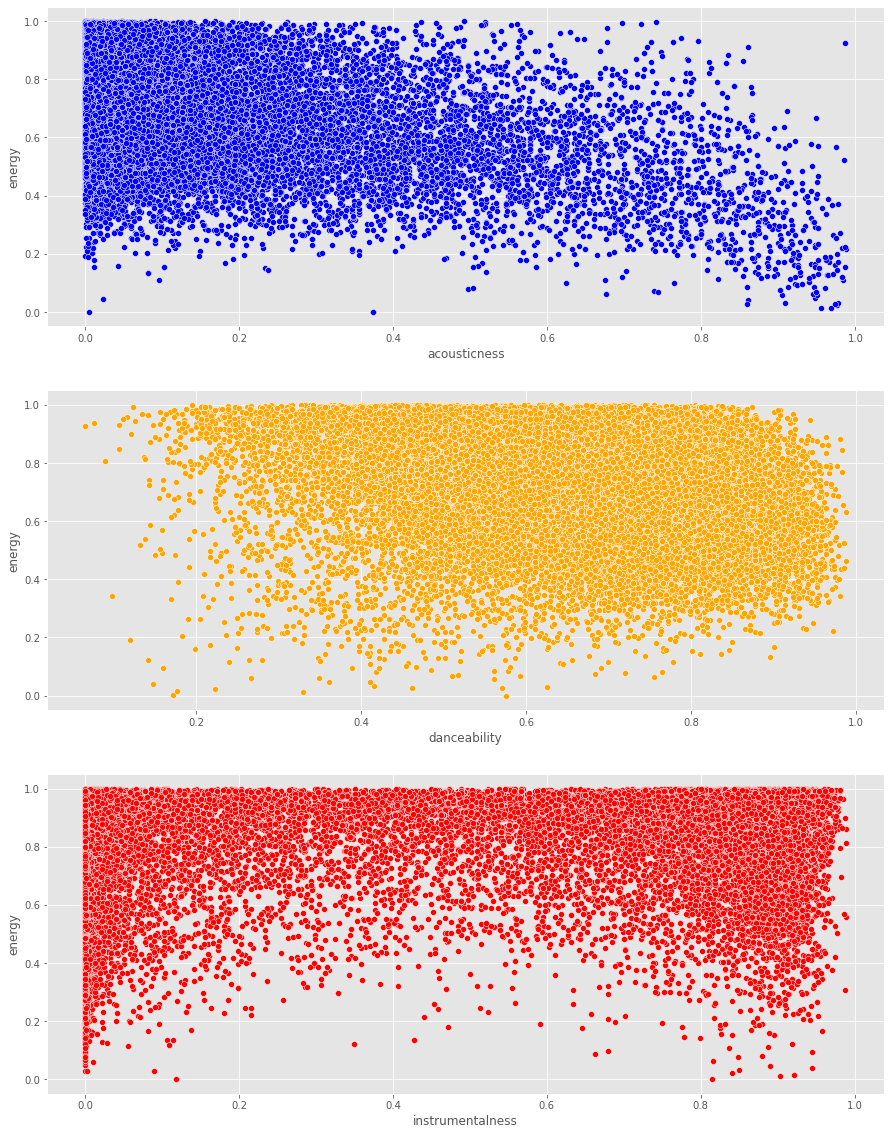

In [19]:
# Now check the effect of the other attributes on the energy --->

fig, ax =plt.subplots(3,1, figsize=(15,20))
sns.scatterplot(x = songs_data['acousticness'], y = songs_data['energy'], ax = ax[0], color = "blue")
sns.scatterplot(x = songs_data['danceability'], y = songs_data['energy'], ax = ax[1], color = "orange")
sns.scatterplot(x = songs_data['instrumentalness'], y = songs_data['energy'], ax = ax[2], color = "red")
# sns.scatterplot(x = songs_data['tempo'], y = songs_data['energy'], ax = ax[3], color = "yellow")
# sns.scatterplot(x = songs_data['valence'], y = songs_data['energy'], ax = ax[4], color = "green")
# sns.scatterplot(x = songs_data['liveness'], y = songs_data['energy'], ax = ax[5], color = "blue")

<AxesSubplot:xlabel='liveness', ylabel='energy'>

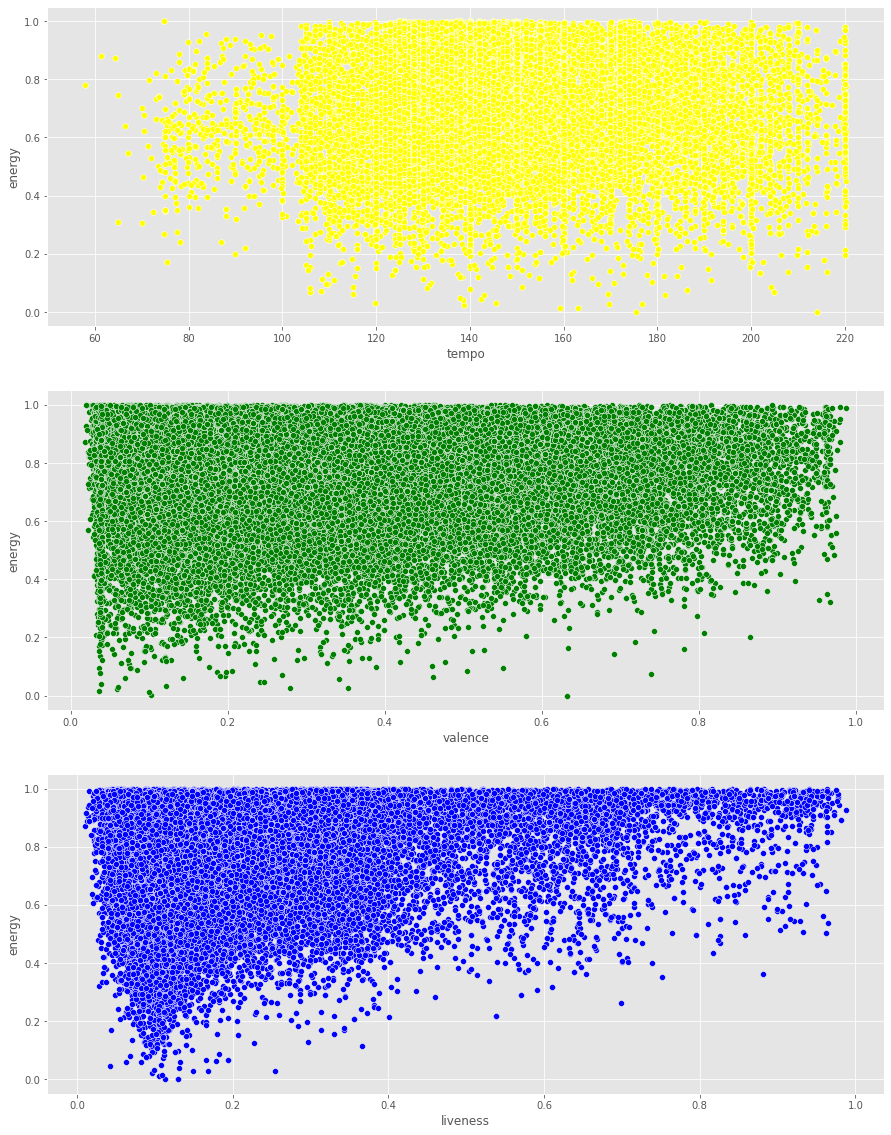

In [20]:
ig, ax =plt.subplots(3,1, figsize=(15,20))
sns.scatterplot(x = songs_data['tempo'], y = songs_data['energy'], ax = ax[0], color = "yellow")
sns.scatterplot(x = songs_data['valence'], y = songs_data['energy'], ax = ax[1], color = "green")
sns.scatterplot(x = songs_data['liveness'], y = songs_data['energy'], ax = ax[2], color = "blue")